In [14]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

Name: 
Type: Graph
Number of nodes: 7
Number of edges: 3
Average degree:   0.8571


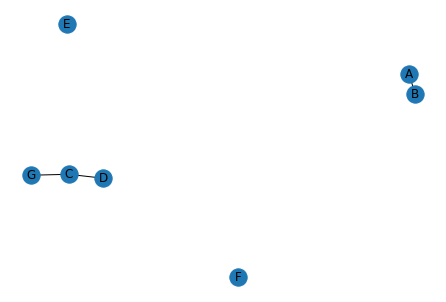

In [18]:
# Practice graph 1
G1 = nx.Graph()
G1.add_nodes_from(['A','B','C','D','E','F','G'])
G1.add_edges_from([('A','B'), ('C','D'), ('C','G')])
# pos = nx.spring_layout(G1)
# nx.draw_networkx_labels(G1, pos)
print(nx.info(G1))
nx.draw(G1, with_labels=True)

In [15]:
# Practice graph 2
G2 = nx.Graph()
# url = 
G2_edges = pd.read_csv(url, error_bad_lines=False)
G2.add_nodes_from(['A','B','C','D','E','F','G'])
G2.add_edges_from([('A','B'), ('C','D'), ('C','G')])
G2.nodes()
# pos = nx.spring_layout(G2)
# nx.draw_networkx_labels(G2, pos)
# nx.draw(G2)

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G'))

Directed graph to for structural equation model for ad placement based on https://www.inference.vc/causal-inference-3-counterfactuals/ and http://jmlr.org/papers/volume14/bottou13a/bottou13a.pdf

In [ ]:
adplace = nx.di